In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from scipy import stats

In [4]:
df_loan = pd.read_csv('./dataset/Dataset_4_loan.csv', sep="|")

In [5]:
df_loan = df_loan.drop(df_loan.iloc[:,0:12],1)

In [6]:
df_loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [11]:
def replace_element(df,param1, param2, param3):
    for x in df[param1]:
        for y in  df.index:
            if  df[param1][y] == param2 :
                df[param1][y] = 0
            elif df[param1][y] == param3:
                df[param1][y] = 1
            elif df[param1][y] == 'None':
                df[param1][y] = np.nan    
            elif df[param1][y] == 'hello':
                df[param1][y] = np.nan
            elif df[param1][y] == 'ù*ùfsfsf///':
                df[param1][y] = np.nan

In [28]:
def remove_element(df,param1, param2):
    for x in df[param1]:
        for y in  df.index:
            if  df[param1][y] == param2 :
                df.drop(x, 0, inplace=True)

In [29]:
# Remplace N
def ReplaceNanByAverage(df,cln):
    df[cln].fillna(df[cln].mean(),inplace=True)
    df_loan

In [32]:
def transform(df, cln):
    df[cln] = df[cln].apply(lambda x: float(x))
    return df

In [33]:
df_loan.count(axis=0)

Loan_ID              981
Gender               895
Married              930
Dependents           906
Education            981
Self_Employed        926
ApplicantIncome      981
CoapplicantIncome    981
LoanAmount           954
Loan_Amount_Term     961
Credit_History       902
Property_Area        981
Loan_Status          614
dtype: int64

In [35]:
# Replace Male by 0 & Female 1
replace_element(df_loan, 'Gender', 'Male', 'Female')

In [37]:
replace_element(df_loan, 'Self_Employed', 'No', 'Yes')

<ipython-input-11-388389062f5c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[param1][y] = 0
<ipython-input-11-388389062f5c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[param1][y] = 1


In [38]:
replace_element(df_loan, 'Married', 'No', 'Yes')

<ipython-input-11-388389062f5c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[param1][y] = 0
<ipython-input-11-388389062f5c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[param1][y] = 1
<ipython-input-11-388389062f5c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[param1][y] = np.nan
<ipython-input-11-388389062f5c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the c

In [39]:
df_loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,NaN,0,0,Graduate,0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,0,1,1,Graduate,0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,0,1,0,Graduate,1,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,0,1,0,Not Graduate,0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,0,0,0,Graduate,0,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,LP002971,0,1,3+,Not Graduate,1,4009,1777.0,113.0,360.0,1.0,Urban,NaN
977,LP002975,0,1,0,Graduate,0,4158,709.0,115.0,360.0,1.0,Urban,NaN
978,LP002980,0,0,0,Graduate,0,3250,1993.0,126.0,360.0,NaN,Semiurban,NaN
979,LP002986,0,1,0,Graduate,0,5000,2393.0,158.0,360.0,1.0,Rural,NaN


In [40]:
df_loan.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,NaN,0,0,Graduate,0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,0,1,1,Graduate,0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,0,1,0,Graduate,1,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,0,1,0,Not Graduate,0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,0,0,0,Graduate,0,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,0,NaN,2,Graduate,1,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,0,1,0,Not Graduate,0,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,NaN,1,3+,Graduate,0,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,0,NaN,NaN,Graduate,0,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,0,NaN,1,Graduate,0,12841,10968.0,349.0,360.0,1.0,Semiurban,N


<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Gender'>

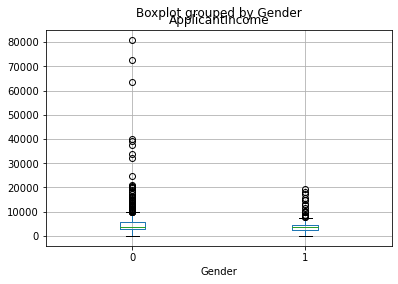

In [42]:
df_loan.boxplot (column = 'ApplicantIncome', by = 'Gender')

In [43]:
df_loan[df_loan['ApplicantIncome'] > 20000].sort_values(by='ApplicantIncome')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
130,LP001469,0,0,0,Graduate,1,20166,0.0,650.0,480.0,NaN,Urban,Y
308,LP001996,0,0,0,Graduate,0,20233,0.0,480.0,360.0,1.0,Rural,N
284,LP001922,0,1,0,Graduate,0,20667,0.0,NaN,360.0,1.0,Rural,N
506,LP002624,0,NaN,0,Graduate,0,20833,6667.0,480.0,360.0,NaN,Urban,Y
126,LP001448,NaN,1,3+,Graduate,0,23803,0.0,370.0,360.0,1.0,Rural,Y
886,LP002485,0,0,1,Graduate,0,24797,0.0,240.0,360.0,1.0,Semiurban,NaN
893,LP002553,NaN,0,0,Graduate,0,29167,0.0,185.0,360.0,1.0,Semiurban,NaN
757,LP001791,0,1,0,Graduate,1,32000,0.0,550.0,360.0,NaN,Semiurban,NaN
183,LP001637,0,1,1,Graduate,0,33846,0.0,260.0,360.0,1.0,Semiurban,N
443,LP002422,0,0,1,Graduate,0,37719,0.0,152.0,360.0,1.0,Semiurban,Y


In [102]:
df_loan[df_loan['LoanAmount'] > 400].sort_values(by='ApplicantIncome')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
177,LP001610,0,Yes,3+,Graduate,0,5516,11300.0,495.0,360.0,0.0,Semiurban,N
523,LP002693,0,Yes,2,Graduate,1,7948,7166.0,480.0,360.0,1.0,Rural,Y
898,LP002570,1,Yes,2,Graduate,0,10000,11666.0,460.0,360.0,1.0,Urban,NaN
808,LP002077,0,Yes,1,Graduate,0,10000,2690.0,412.0,360.0,1.0,Semiurban,NaN
604,LP002959,NaN,Yes,1,Graduate,0,12000,0.0,496.0,360.0,1.0,Semiurban,Y
432,LP002386,0,No,0,Graduate,NaN,12876,0.0,405.0,360.0,1.0,Semiurban,Y
278,LP001907,0,Yes,0,Graduate,0,14583,0.0,436.0,360.0,1.0,Semiurban,Y
487,LP002547,0,Yes,1,Graduate,0,18333,0.0,500.0,360.0,1.0,Urban,N
561,LP002813,1,Yes,1,Graduate,1,19484,0.0,600.0,360.0,1.0,Semiurban,Y
369,LP002191,0,Yes,0,Graduate,0,19730,5266.0,570.0,360.0,1.0,Rural,N


In [ ]:
# Suppression de la ligne 409 car le revenu de la personne contient trois zero
df_loan.drop(409)

In [31]:
def show_missing_value(df):   # reporte le nombre de valeurs manquantes pour chaque colonne
    for col in df.columns:
        missing_series = df[col][df[col].isna() == True]
        if missing_series.size > 0:
            print(col, missing_series.size)
        plt.show()
        
show_missing_value(df_loan)

Gender 86
Married 51
Dependents 75
Self_Employed 55
LoanAmount 27
Loan_Amount_Term 20
Credit_History 79
Loan_Status 367


In [ ]:
df_loan['Gender']  = df_loan['Gender'].apply(lambda x: float(x))

In [ ]:
trasform(df_loan, 'Married')

In [30]:
# Renvoie une série booléenne indiquant des lignes en double.
# def verify_doublon(df, param1):
#     df_loan_duplicate = df[param1][df.duplicated()]
#     df_duplicates_removed = pd.DataFrame.drop_duplicates(df)
#     for x in df[param1]:
#         for y in  df.index():
#             if df[param1][y]

# verify_doublon(df_loan)

In [ ]:
# df_duplicates_removed = pd.DataFrame.drop_duplicates(df)